# Active Contours using Parameteric Curves

This tour explores image segmentation using parametric active contours.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$


*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.

In [1]:
using PyPlot
using NtToolBox
using Autoreload


  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:1
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:1
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:7
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:7
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:12


Parameteric Curves
-------------------

In this tours, the active contours are represented using parametric
curve $ \ga : [0,1] \rightarrow \RR^2 $. 


This curve is discretized using a piewise linear curve with 
$p$ segments, and is stored as a complex vector of points in the plane
$\ga \in \CC^p$.

Initial polygon.

In [2]:
gamma0 = [.78, .14, .42, .18, .32, .16, .75, .83, .57, .68, .46, .40, .72, .79, .91, .90] + 1im*[.87, .82, .75, .63, .34, .17, .08, .46, .50, .25, .27, .57, .73, .57, .75, .79]

16-element Array{Complex{Float64},1}:
 0.78+0.87im
 0.14+0.82im
 0.42+0.75im
 0.18+0.63im
 0.32+0.34im
 0.16+0.17im
 0.75+0.08im
 0.83+0.46im
 0.57+0.5im 
 0.68+0.25im
 0.46+0.27im
  0.4+0.57im
 0.72+0.73im
 0.79+0.57im
 0.91+0.75im
  0.9+0.79im

 instead.
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31


Display the initial curve.

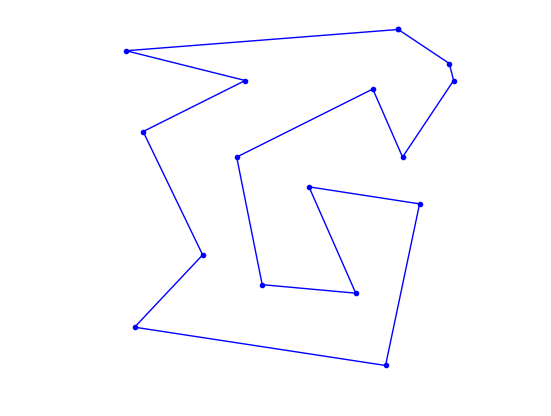

(0.1015,0.9485,0.040499999999999994,0.9095)

In [3]:
periodize = gamma -> [gamma; [gamma[1]]]
function cplot(gamma, s = "b", lw = 1) 
    plot(real(periodize(gamma)), imag(periodize(gamma)), s, linewidth = lw)
    axis("equal")
    axis("off")
end
cplot(gamma0, "b.-")

Number of points of the discrete curve.

In [4]:
p = 256

256

Shortcut to re-sample a curve according to arc length.

In [5]:
using Dierckx
curvabs = gamma -> [0; cumsum(1e-5 .+ abs(gamma[1:end - 1] - gamma[2:end]) )]
resample11 = (gamma, d) -> evaluate(Spline1D(d./d[end], real(gamma), k=1), (0:p-1)./p)
resample12 = (gamma, d) -> evaluate(Spline1D(d./d[end], imag(gamma), k=1), (0:p-1)./p)
resample = gamma -> resample11( [gamma; gamma[1]], curvabs( [gamma; gamma[1]] ) ) + 1im*resample12( [gamma; gamma[1]], curvabs( [gamma; gamma[1]] ) )


(::#9) (generic function with 1 method)

Initial curve $ \ga_1(t)$.

In [6]:
gamma1 = resample(gamma0)

256-element Array{Complex{Float64},1}:
     0.78+0.87im    
 0.761553+0.868559im
 0.743106+0.867118im
 0.724659+0.865676im
 0.706212+0.864235im
 0.687764+0.862794im
 0.669317+0.861353im
  0.65087+0.859912im
 0.632423+0.858471im
 0.613976+0.857029im
 0.595529+0.855588im
 0.577082+0.854147im
 0.558635+0.852706im
         ⋮          
 0.889715+0.719573im
 0.899979+0.734968im
 0.909894+0.750424im
 0.905407+0.768371im
 0.900921+0.786317im
 0.887764+0.798157im
 0.872369+0.808421im
 0.856974+0.818684im
 0.841579+0.828947im
 0.826185+0.83921im 
  0.81079+0.849474im
 0.795395+0.859737im

Display the initial curve.

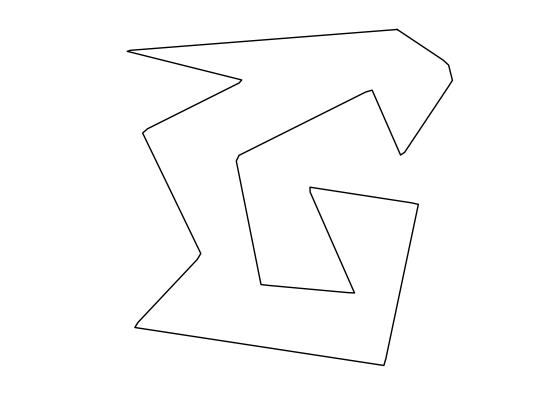

(0.10727700934498144,0.9481138973125205,0.040705710689687556,0.909490204252872)

In [7]:
cplot(gamma1, "k")

Shortcut for forward and backward finite differences.

In [8]:
BwdDiff = c -> c - [c[end]; c[1:end - 1]]
FwdDiff = c -> [c[2:end]; c[1]] - c
dotp = (c1, c2) -> real(c1.*conj(c2))

(::#15) (generic function with 1 method)

The tangent to the curve is computed as
$$ t_\ga(s) = \frac{\ga'(t)}{\norm{\ga'(t)}} $$
and the normal is $ n_\ga(t) = t_\ga(t)^\bot. $

Shortcut to compute the tangent and the normal to a curve.

In [9]:
normalize = v -> v./max(abs(v), 1e-10)
tangent = gamma -> normalize( FwdDiff(gamma) )
normal = gamma -> -1im*tangent(gamma)

(::#21) (generic function with 1 method)

Move the curve in the normal direction, by computing $ \ga_1(t) \pm \delta n_{\ga_1}(t) $.

In [10]:
delta = .03
gamma2 = gamma1 .+ delta .* normal(gamma1)
gamma3 = gamma1 .- delta .* normal(gamma1)

256-element Array{Complex{Float64},1}:
 0.782337+0.840091im
  0.76389+0.83865im 
 0.745442+0.837209im
 0.726995+0.835768im
 0.708548+0.834326im
 0.690101+0.832885im
 0.671654+0.831444im
 0.653207+0.830003im
  0.63476+0.828562im
 0.616313+0.827121im
 0.597866+0.825679im
 0.579418+0.824238im
 0.560971+0.822797im
         ⋮          
 0.864754+0.736214im
 0.874728+0.751167im
  0.88079+0.743148im
 0.876303+0.761095im
 0.880853+0.764018im
 0.871123+0.773196im
 0.855728+0.783459im
 0.840333+0.793722im
 0.824938+0.803986im
 0.809544+0.814249im
 0.794149+0.824512im
 0.778754+0.834775im

Display the curves.

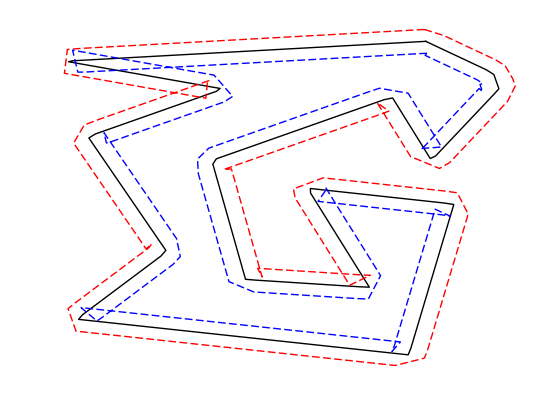

(0.09818192340611892,0.979037189504653,0.011000256259768873,0.942237845572892)

In [11]:
cplot(gamma1, "k")
cplot(gamma2, "r--")
cplot(gamma3, "b--")
axis("tight") 
axis("off")

## Evolution by Mean Curvature

A curve evolution is a series of curves $ s \mapsto \ga_s $ indexed by
an evolution parameter $s \geq 0$. The intial curve $\ga_0$ for
$s=0$ is evolved, usually by minizing some energy $E(\ga)$ in a gradient descent
$$ \frac{\partial \ga_s}{\partial s} = \nabla E(\ga_s). $$


Note that the gradient of an energy is defined with respect to the
curve-dependent inner product
$$ \dotp{a}{b} = \int_0^1 \dotp{a(t)}{b(t)} \norm{\ga'(t)} d t.  $$
The set of curves can thus be thought as being a Riemannian surface.


The simplest evolution is the mean curvature evolution.
It corresponds to minimization of the curve length
$$ E(\ga) = \int_0^1 \norm{\ga'(t)} d t $$


The gradient of the length is 
$$ \nabla E(\ga)(t) = -\kappa_\ga(t) n_\ga(t)  $$
where $ \kappa_\ga $ is the curvature, defined as
$$ \kappa_\ga(t) = \frac{1}{\norm{\ga'(t)}} \dotp{ t_\ga'(t) }{ n_\ga(t) } . $$



Shortcut for normal times curvature $ \kappa_\ga(t) n_\ga(t) $.

In [12]:
normalC = gamma -> BwdDiff(tangent(gamma)) ./ abs( FwdDiff(gamma) )

(::#23) (generic function with 1 method)

Time step for the evolution.
It should be very small because we use an explicit time stepping and the
curve has strong curvature.

In [13]:
dt = 0.001 / 100

1.0e-5

Number of iterations.

In [14]:
Tmax = 3.0 / 100
niter = round(Tmax/dt)

3000.0

Initialize the curve for $s=0$.

In [15]:
gamma = gamma1

256-element Array{Complex{Float64},1}:
     0.78+0.87im    
 0.761553+0.868559im
 0.743106+0.867118im
 0.724659+0.865676im
 0.706212+0.864235im
 0.687764+0.862794im
 0.669317+0.861353im
  0.65087+0.859912im
 0.632423+0.858471im
 0.613976+0.857029im
 0.595529+0.855588im
 0.577082+0.854147im
 0.558635+0.852706im
         ⋮          
 0.889715+0.719573im
 0.899979+0.734968im
 0.909894+0.750424im
 0.905407+0.768371im
 0.900921+0.786317im
 0.887764+0.798157im
 0.872369+0.808421im
 0.856974+0.818684im
 0.841579+0.828947im
 0.826185+0.83921im 
  0.81079+0.849474im
 0.795395+0.859737im

Evolution of the curve.

In [16]:
gamma = gamma .+ dt .* normalC(gamma)

256-element Array{Complex{Float64},1}:
 0.779911+0.869658im
 0.761553+0.868559im
 0.743106+0.867118im
 0.724659+0.865676im
 0.706212+0.864235im
 0.687764+0.862794im
 0.669317+0.861353im
  0.65087+0.859912im
 0.632423+0.858471im
 0.613976+0.857029im
 0.595529+0.855588im
 0.577082+0.854147im
 0.558635+0.852706im
         ⋮          
 0.889715+0.719573im
 0.899971+0.734974im
 0.909471+0.750493im
 0.905407+0.768371im
 0.900638+0.786147im
 0.887716+0.798096im
 0.872369+0.808421im
 0.856974+0.818684im
 0.841579+0.828947im
 0.826185+0.83921im 
  0.81079+0.849474im
 0.795395+0.859737im

To stabilize the evolution, it is important to re-sample the curve so
that it is unit-speed parametrized. You do not need to do it every time
step though (to speed up).

In [17]:
gamma = resample(gamma)

256-element Array{Complex{Float64},1}:
 0.779911+0.869658im
  0.76173+0.868569im
 0.743572+0.867154im
 0.725414+0.865735im
 0.707255+0.864317im
 0.689097+0.862898im
 0.670939+0.86148im 
 0.652781+0.860061im
 0.634623+0.858642im
 0.616465+0.857224im
 0.598307+0.855805im
 0.580149+0.854387im
  0.56199+0.852968im
         ⋮          
 0.890755+0.721134im
 0.900799+0.736326im
 0.909116+0.752056im
 0.905023+0.769802im
  0.89969+0.787023im
 0.886136+0.799159im
 0.871021+0.80932im 
 0.855866+0.819423im
 0.840712+0.829526im
 0.825557+0.839629im
 0.810403+0.849732im
 0.795246+0.859832im

**Exercise 1:** Perform the curve evolution.
You need to resample it a few times.

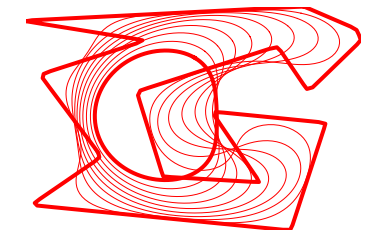

In [18]:
run -i nt_solutions/segmentation_2_snakes_param/exo1

## Geodesic Active Contours

Geodesic active contours minimize a weighted length
$$ E(\ga) = \int_0^1 W(\ga(t)) \norm{\ga'(t)} d t, $$
where $W(x)>0$ is the geodesic metric, that should be small in areas
where the image should be segmented.

Size of the image $n$.

In [18]:
n = 200

200

Create a synthetic weight $W(x)$.

In [19]:
nbumps = 40
theta = rand(nbumps,1).*(2*pi)
r = .6*n/2
a = [.62*n,.6*n]
x = round( a[1] + r*cos(theta) )
y = round( a[2] + r*sin(theta) )
W = zeros(n, n)
for i in 1:nbumps
    W[Int(x[i]), Int(y[i])] = 1
end
W = gaussian_blur(W, 6.0)
W = rescale( -min(W, .05), .3,1)

200×200 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.

Display the metric $W$.

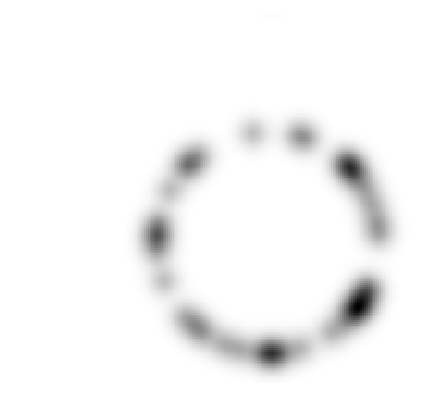

In [20]:
imageplot(W)

Pre-compute the gradient $\nabla W(x)$ of the metric.

In [21]:
G = grad(W)
G = G[:,:,1] .+ 1im*G[:, :, 2]

200×200 Array{Complex{Float64},2}:
                  0.0+0.0im  …                   0.0+0.0im
                  0.0+0.0im                      0.0+0.0im
                  0.0+0.0im                      0.0+0.0im
                  0.0+0.0im                      0.0+0.0im
                  0.0+0.0im                      0.0+0.0im
                  0.0+0.0im  …                   0.0+0.0im
                  0.0+0.0im                      0.0+0.0im
                  0.0+0.0im                      0.0+0.0im
                  0.0+0.0im                      0.0+0.0im
                  0.0+0.0im                      0.0+0.0im
                  0.0+0.0im  …                   0.0+0.0im
                  0.0+0.0im                      0.0+0.0im
                  0.0+0.0im                      0.0+0.0im
                     ⋮       ⋱                            
 8.25562e-13+8.98837e-13im      2.03948e-12+2.19447e-12im 
 3.72147e-13+3.99458e-13im      9.23484e-13+9.80549e-13im 
 1.63647e-13+1.73639e

Display the image of the magnitude $\norm{\nabla W(x)}$ of the gradient.

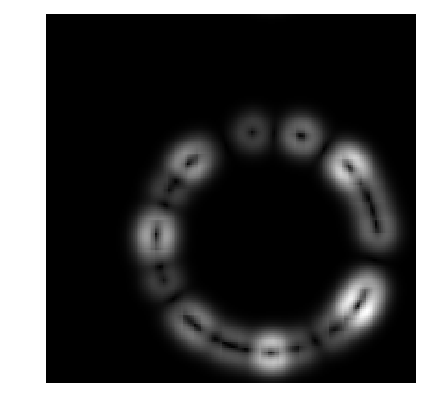

In [22]:
imageplot(abs(G))

Shortcut to evaluate the gradient and the potential along a curve.

In [23]:
EvalG = gamma -> bilinear_interpolate(G, imag(gamma), real(gamma))
EvalW = gamma -> bilinear_interpolate(W, imag(gamma), real(gamma))

(::#27) (generic function with 1 method)

Create a circular curve $\ga_0$.

In [24]:
r = .98*n/2 # radius
p = 128 # number of points on the curve
theta = transpose( linspace(0, 2*pi, p + 1) )
theta = theta[1 : end]
gamma0 = n/2 * (1 + 1im) +  r*(cos(theta) + 1im*sin(theta))

129-element Array{Complex{Float64},1}:
   198.0+100.0im  
 197.882+104.809im
 197.528+109.606im
 196.939+114.38im 
 196.117+119.119im
 195.063+123.812im
  193.78+128.448im
 192.271+133.015im
  190.54+137.503im
 188.591+141.9im  
 186.428+146.197im
 184.057+150.382im
 181.484+154.446im
        ⋮         
 184.057+49.6179im
 186.428+53.8031im
 188.591+58.0996im
  190.54+62.497im 
 192.271+66.9848im
  193.78+71.5521im
 195.063+76.1879im
 196.117+80.8811im
 196.939+85.6204im
 197.528+90.3943im
 197.882+95.1914im
   198.0+100.0im  

Initialize the curve at time $t=0$ with a circle.

In [57]:
gamma = gamma0

129-element Array{Complex{Float64},1}:
   198.0+100.0im  
 197.882+104.809im
 197.528+109.606im
 196.939+114.38im 
 196.117+119.119im
 195.063+123.812im
  193.78+128.448im
 192.271+133.015im
  190.54+137.503im
 188.591+141.9im  
 186.428+146.197im
 184.057+150.382im
 181.484+154.446im
        ⋮         
 184.057+49.6179im
 186.428+53.8031im
 188.591+58.0996im
  190.54+62.497im 
 192.271+66.9848im
  193.78+71.5521im
 195.063+76.1879im
 196.117+80.8811im
 196.939+85.6204im
 197.528+90.3943im
 197.882+95.1914im
   198.0+100.0im  

For this experiment, the time step should be larger, because the
curve is in $[0,n-1] \times [0,n-1]$.

In [45]:
dt = 1

1

Number of iterations.

In [46]:
Tmax = 5000
niter = round(Tmax/ dt)

5000.0

Display the curve on the background.

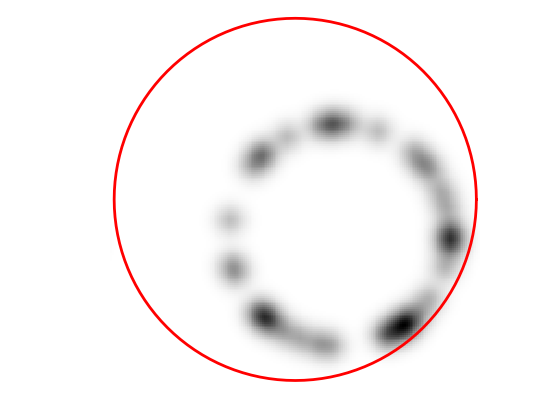

(-0.5,199.5,199.5,-0.5)

In [47]:
lw = 2
clf
imageplot(transpose(W))
cplot(gamma, "r", lw)

The gradient of the energy is
$$ \nabla E(\ga) = -W(\ga(t)) \kappa_\ga(t) n_\ga(t) + \dotp{\nabla W(\ga(t))}{ n_\ga(t) } n_\ga(t). $$

Pointwise innerproduct on the curve.

In [30]:
#dotp = lambda c1,c2: real(c1)*real(c2) + imag(c1)*imag(c2)

Evolution of the curve according to this gradient.

In [65]:
N = normal(gamma)
g = - EvalW(gamma) * normalC(gamma) + dotp(EvalG(gamma), N) * N # I'm not sure of this product. But when it is .* , we encounter a problem with function resample
gamma = gamma .- dt*g


129-element Array{Complex{Float64},1}:
 -8.60367e11-3.50375e13im
 -8.59819e11-3.50152e13im
 -8.59232e11-3.49913e13im
 -8.58198e11-3.49492e13im
 -8.56191e11-3.48674e13im
 -8.51551e11-3.46785e13im
 -8.44902e11-3.44077e13im
  -8.3394e11-3.39613e13im
 -8.12444e11-3.30859e13im
 -7.79551e11-3.17464e13im
 -7.41951e11-3.02151e13im
 -6.95247e11-2.83132e13im
 -6.64033e11-2.7042e13im 
            ⋮            
 -6.93909e11-2.82587e13im
 -7.38248e11-3.00644e13im
 -7.83726e11-3.19164e13im
 -8.12467e11-3.30868e13im
 -8.31343e11-3.38555e13im
 -8.44715e11-3.44001e13im
 -8.52298e11-3.47089e13im
 -8.55557e11-3.48416e13im
 -8.58052e11-3.49432e13im
 -8.59335e11-3.49955e13im
 -8.60077e11-3.50257e13im
 -8.59972e11-3.50214e13im

To avoid the curve from being poorly sampled, it is important to
re-sample it evenly.

In [66]:
gamma = resample(gamma)

128-element Array{Complex{Float64},1}:
 -8.60367e11-3.50375e13im
 -8.53795e11-3.47699e13im
 -8.47223e11-3.45022e13im
 -8.40651e11-3.42346e13im
 -8.34079e11-3.3967e13im 
 -8.27507e11-3.36993e13im
 -8.20935e11-3.34317e13im
 -8.14363e11-3.3164e13im 
 -8.07791e11-3.28964e13im
 -8.01218e11-3.26287e13im
 -7.94646e11-3.23611e13im
 -7.88074e11-3.20935e13im
 -7.81502e11-3.18258e13im
            ⋮            
 -7.81713e11-3.18344e13im
 -7.88285e11-3.2102e13im 
 -7.94857e11-3.23697e13im
 -8.01429e11-3.26373e13im
 -8.08001e11-3.2905e13im 
 -8.14573e11-3.31726e13im
 -8.21145e11-3.34402e13im
 -8.27717e11-3.37079e13im
 -8.34289e11-3.39755e13im
 -8.40862e11-3.42432e13im
 -8.47434e11-3.45108e13im
 -8.54006e11-3.47784e13im

**Exercise 2:** Perform the curve evolution.

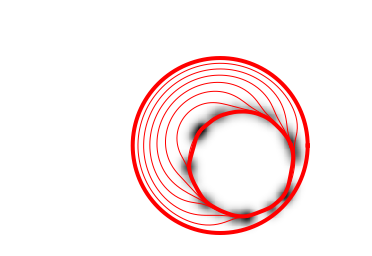

In [33]:
run -i nt_solutions/segmentation_2_snakes_param/exo2

# Medical Image Segmentation

One can use a gradient-based metric to perform edge detection in medical
images.

Load an image $f$.

In [68]:
n = 256
name = "NtToolBox/src/data/cortex.png"
f = load_image(name, n)

256×256 Array{Float32,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

Display.

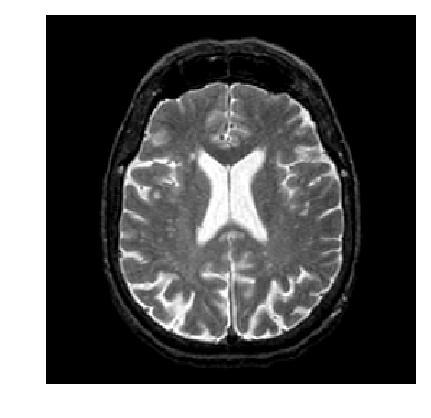

In [69]:
imageplot(f)

An edge detector metric can be defined as a decreasing function of the
gradient magnitude.
$$ W(x) = \psi( d \star h_a(x) )
      \qwhereq d(x) = \norm{\nabla f(x)}. $$
where $h_a$ is a blurring kernel of width $a>0$.

Compute the magnitude of the gradient.

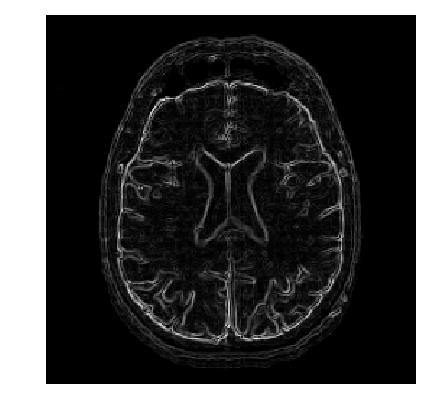

In [79]:
G = grad(f)
d0 = sqrt(sum(G.^2, 3))
imageplot(d0[:, :, 1])

Blur it by $h_a$.

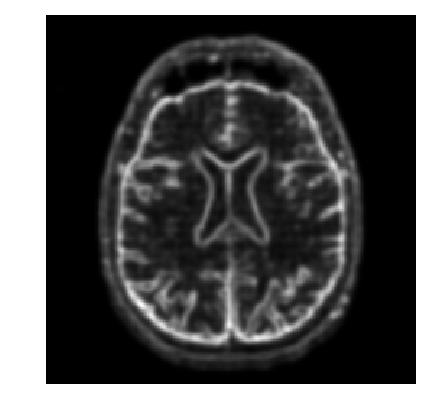

In [82]:
a = 2
d = gaussian_blur(d0, a)
imageplot(d[:, :, 1])

Compute a decreasing function of the gradient to define $W$.

In [83]:
d = min(d, .4)
W = rescale(-d, .8, 1)

256×256×1 Array{Float64,3}:
[:, :, 1] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0

Display it.

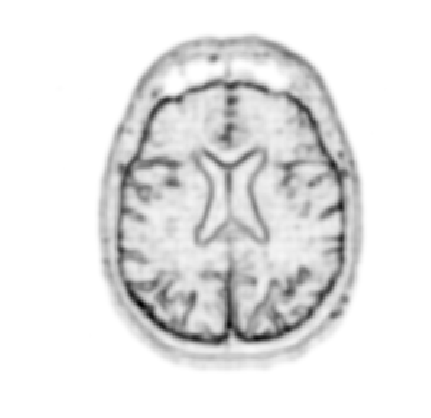

In [84]:
imageplot(W[:, :, 1])

Number of points.

In [85]:
p = 128

128

**Exercise 3:** Create an initial circle $\gamma_0$ of $p$ points. When plotting the image, you need to transpose it to have axis coherent with the cplot.

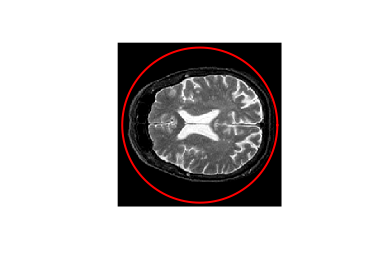

In [41]:
run -i nt_solutions/segmentation_2_snakes_param/exo3

Step size.

In [86]:
dt = 2

2

Number of iterations.

In [87]:
Tmax = 9000
niter = round(Tmax/ dt)

4500.0

**Exercise 4:** Perform the curve evolution.

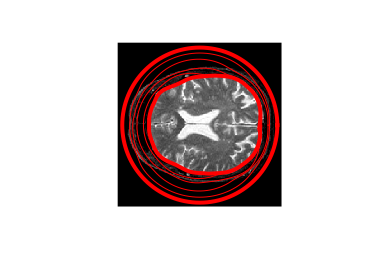

In [44]:
run -i nt_solutions/segmentation_2_snakes_param/exo4

# Evolution of a Non-closed Curve

It is possible to perform the evolution of a non-closed curve by adding
boundary constraint
$$ \ga(0)=x_0 \qandq \ga(1)=x_1. $$


In this case, the algorithm find a local minimizer of the geodesic
distance between the two points.


Note that a much more efficient way to solve this problem is to use the
Fast Marching algorithm to find the global minimizer of the geodesic
length.


Load an image $f$.

In [88]:
n = 256
f = load_image(name, n)
f = f[45:105, 60:120]
n = size(f)[1]

61

Display.

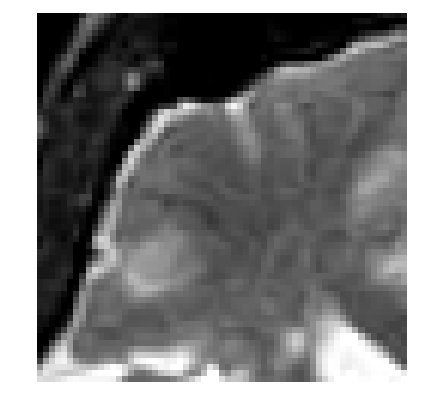

In [89]:
imageplot(f)

**Exercise 5:** Compute an edge attracting criterion $W(x)>0$, that is small in area of strong
gradient.

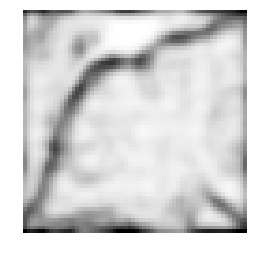

In [47]:
run -i nt_solutions/segmentation_2_snakes_param/exo5

Start and end points $x_0$ and $x_1$.

In [48]:
x0 = 4 + 55j
x1 = 53 + 4j

Initial curve $\ga_0$.

In [49]:
p = 128
t = transpose(linspace(0, 1, p))
gamma0 = t*x1 + (1-t)*x0

Initialize the evolution.

In [50]:
gamma = gamma0

Display.

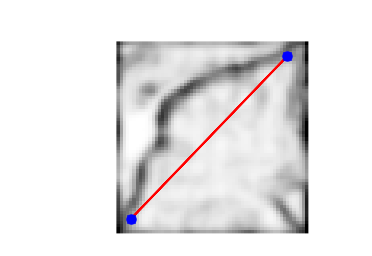

In [51]:
clf
imageplot(transpose(W))
cplot(gamma,'r', 2)
plot(real(gamma[0]), imag(gamma[0]), 'b.', markersize=20)
plot(real(gamma[-1]), imag(gamma[-1]), 'b.', markersize=20);

Re-sampling for non-periodic curves.

In [52]:
curvabs = lambda gamma: concatenate( ([0], cumsum( 1e-5 + abs(gamma[:-1:]-gamma[1::]) ) ) )
resample1 = lambda gamma,d: interpc(arange(0,p)/float(p-1),  d/d[-1],gamma)
resample = lambda gamma: resample1( gamma, curvabs(gamma) )

Time step.

In [53]:
dt = 1/10

Number of iterations.

In [54]:
Tmax = 2000*4/ 7
niter = round(Tmax/ dt)

**Exercise 6:** Perform the curve evolution.
Be careful to impose the boundary conditions at each step.

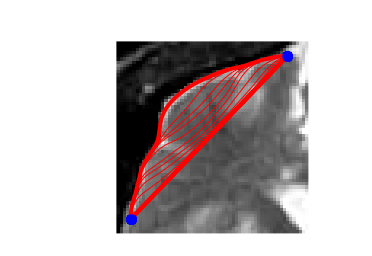

In [55]:
run -i nt_solutions/segmentation_2_snakes_param/exo6